In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
#loading dataset and extracting independent and dependent variables
insurance = pd.read_csv('Downloads/insurance.csv')
x = insurance.iloc[:, :-1].values
y = insurance.iloc[:, 6].values

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:>

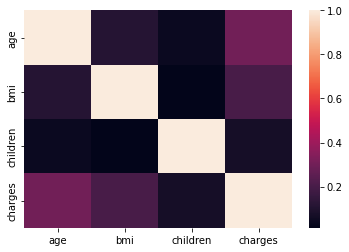

In [3]:
# Visualizing Data
# Building a correlation matrix of dataset

sns.heatmap(insurance.corr())

In [4]:
#Encoding categorical data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 5] = labelencoder.fit_transform(x[:, 5])

onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()


In [5]:
#Avoide Dummy Variable Trap
x = x[:, 1:]

In [6]:
#Splitting dataset into Training and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [7]:
#Fitting Multiple Linear Regression to the Training Data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[ 1.34400000e+04  1.23896454e+17  3.95520000e+04  1.15200000e+04
  5.65914106e+17  4.86400000e+03  2.68800000e+03  1.54880000e+04
  7.80800000e+03  3.84000000e+03  1.63121513e+17  1.83040000e+04
  6.01600000e+03  5.50400000e+03  2.90560000e+04 -1.79097134e+17
  1.26720000e+04  1.70240000e+04  5.12000000e+03 -1.78214172e+17
  2.59840000e+04  2.26560000e+04  8.70400000e+03  1.31532619e+17
  4.47310582e+16  5.12000000e+02 -8.83200000e+03  8.32000000e+03
  4.35200000e+03  1.42080000e+04  1.40800000e+03  3.84000000e+04
  1.60000000e+04  1.79840634e+16 -2.72977259e+16  5.50400000e+03
  1.65120000e+04  5.98318852e+16  3.32800000e+04 -3.58400000e+03
  8.57600000e+03 -5.76000000e+03  2.57280000e+04  3.94240000e+04
  2.50880000e+04  2.81600000e+03  1.31532619e+17  5.50400000e+03
  2.57590905e+17  5.24800000e+03  7.76140919e+16  4.60800000e+03
  3.78880000e+04  3.22560000e+04  1.02400000e+04  2.53215180e+17
 -5.46939490e+16  1.13920000e+04  6.24042943e+17  1.43360000e+04
  1.66400000e+03  3.36640

In [9]:
# Calculating Coefficients
print(regressor.coef_)

[ 2.47722413e+03 -2.21085668e+03 -1.72967993e+01  3.31660940e+03
  2.95443767e+03  5.41668015e+03 -6.23352739e+02  3.42301571e+03
  5.24842416e+03  3.84521779e+03  1.59900125e+03  3.25037263e+03
  4.11176612e+03  1.61302040e+02  6.08151868e+03  4.62136509e+03
  3.69277685e+03  5.22968023e+03  5.83291794e+03  3.15085709e+03
  2.78217072e+03  2.51112351e+03  4.40303617e+03  2.68250800e+03
  3.19664398e+03  6.96687072e+03  8.32686610e+03  6.94252223e+03
  7.72499249e+03  6.86658992e+03  7.48522327e+03  1.29784563e+04
  6.54684160e+03  8.90904708e+03  1.07750797e+04  1.21430240e+04
  1.03038094e+04  9.86437402e+03  9.50060571e+03  9.98912358e+03
  1.22659841e+04  1.21369926e+04  1.36445607e+04  1.10287447e+04
  1.12471480e+04  1.50513156e+04  4.05920211e+17  4.05920211e+17
  9.18011044e+14  9.18011044e+14  9.18011044e+14  9.18011044e+14
  9.18011044e+14  9.18011044e+14  9.18011044e+14  9.18011044e+14
  9.18011044e+14  9.18011044e+14  9.18011044e+14  9.18011044e+14
  5.66832117e+17  9.18011

In [10]:
#Calculating Intercept
print(regressor.intercept_)

-6.405206139008119e+17


In [11]:
#Evaluating Model by calculating R Squared value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-6.52841967718707e+25

In [12]:
y_test_mean = np.full(len(y_test), y_test.mean())

In [13]:
y_test.mean()

13546.866383690298

In [14]:
r2_score(y_test, y_test_mean)

0.0

In [15]:
r2_score(y_test, y_test)

1.0

In [16]:
r2_score(y_pred, y_test)

-0.0006696755854334047

In [17]:
r2_score(y_test, y_pred)

-6.52841967718707e+25

In [18]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

3.1944977644975764e+16

In [19]:
# Mean squared Error

from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_pred)
mse

1.038867177253802e+34

In [20]:
# Root Mean Squared Error
import math 
rmse = math.sqrt(mse)
rmse

1.0192483393431662e+17